In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
file = pd.read_csv(url)
data = file.iloc[:,1:]
data = data.dropna()

# Sales 데이터에서 'K'와 'M'를 곱셈으로 해결
data['NA_Sales'] = data['NA_Sales'].map(lambda x : x.replace('K','*1000'))
data['NA_Sales'] = data['NA_Sales'].map(lambda x : x.replace('M','*1000000'))

data['EU_Sales'] = data['EU_Sales'].map(lambda x : x.replace('K','*1000'))
data['EU_Sales'] = data['EU_Sales'].map(lambda x : x.replace('M','*1000000'))

data['JP_Sales'] = data['JP_Sales'].map(lambda x : x.replace('K','*1000'))
data['JP_Sales'] = data['JP_Sales'].map(lambda x : x.replace('M','*1000000'))

data['Other_Sales'] = data['Other_Sales'].map(lambda x : x.replace('K','*1000'))
data['Other_Sales'] = data['Other_Sales'].map(lambda x : x.replace('M','*1000000'))

def strTofloat(obj):
  try:
    num1 = float(obj.split('*')[0])
    num2 = float(obj.split('*')[1])
    prod = num1*num2
    return prod
  except:
    return float(obj)

data['NA_Sales'] = data['NA_Sales'].apply(strTofloat)
data['EU_Sales'] = data['EU_Sales'].apply(strTofloat)
data['JP_Sales'] = data['JP_Sales'].apply(strTofloat)
data['Other_Sales'] = data['Other_Sales'].apply(strTofloat)

def makeYear(num):
  num = int(num)
  if num<20:
    num+=2000
    return num
  elif 20<num<100:
    num+=1900
    return num
  else:
    return num

data['Year'] = data['Year'].apply(makeYear)

# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [131]:
##### Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 #####

# 밀리언 셀러 추출하기
pd.set_option('display.max_columns', 10)

data['Total_Sales'] = data['NA_Sales']+data['EU_Sales']+data['Other_Sales']

Total_ranking = data.sort_values(by='Total_Sales', ascending=False).reset_index()
Total_M_ind = np.where(Total_ranking['Total_Sales']>=1000000)
Total_M = Total_ranking.iloc[Total_M_ind]
Total_M = Total_M[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']]

NA_ranking = data.sort_values(by='NA_Sales', ascending=False).reset_index()
NA_M_ind = np.where(NA_ranking['NA_Sales']>=1000000)
NA_M = NA_ranking.iloc[NA_M_ind]
NA_M = NA_M[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']]

EU_ranking = data.sort_values(by='EU_Sales', ascending=False).reset_index()
EU_M_ind = np.where(EU_ranking['EU_Sales']>=1000000)
EU_M = EU_ranking.iloc[EU_M_ind]
EU_M = EU_M[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']]

JP_ranking = data.sort_values(by='JP_Sales', ascending=False).reset_index()
JP_M_ind = np.where(JP_ranking['JP_Sales']>=1000000)
JP_M = JP_ranking.iloc[JP_M_ind]
JP_M = JP_M[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]

Other_ranking = data.sort_values(by='Other_Sales', ascending=False).reset_index()
Other_M_ind = np.where(Other_ranking['Other_Sales']>=1000000)
Other_M = Other_ranking.iloc[Other_M_ind]
Other_M = Other_M[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']]

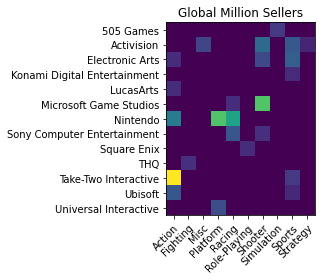

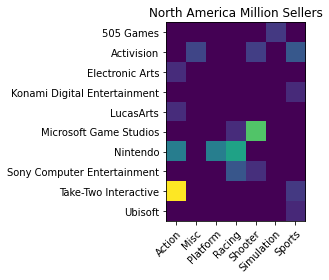

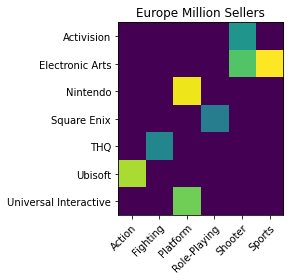

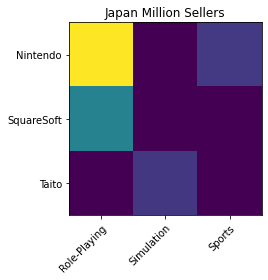

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


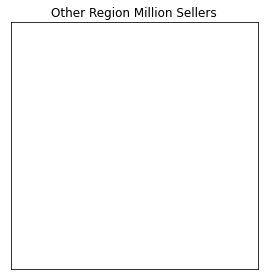

In [132]:
## Global 밀리언셀러 히트맵
# Crosstab 생성
Total_M_ct = pd.DataFrame(Total_M.pivot_table(values='Total_Sales', index='Publisher', columns='Genre', aggfunc=sum).fillna(0))
Total_pub = Total_M_ct.index
Total_gen = Total_M_ct.columns

# 히트맵 그리기
fig, ax = plt.subplots()
im = ax.imshow(Total_M_ct)

# X축과 Y축 구간 그리기
ax.set_xticks(np.arange(len(Total_gen)))
ax.set_yticks(np.arange(len(Total_pub)))

# X축과 Y축 구간 명명
ax.set_xticklabels(Total_gen)
ax.set_yticklabels(Total_pub)

# X축과 Y축 구간 이름 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Global Million Sellers")
fig.tight_layout()
plt.show()

## North America 밀리언셀러 히트맵
# Crosstab 생성
NA_M_ct = pd.DataFrame(NA_M.pivot_table(values='NA_Sales', index='Publisher', columns='Genre', aggfunc=sum).fillna(0))
NA_pub = NA_M_ct.index
NA_gen = NA_M_ct.columns

# 히트맵 그리기
fig, ax = plt.subplots()
im = ax.imshow(NA_M_ct)

# X축과 Y축 구간 그리기
ax.set_xticks(np.arange(len(NA_gen)))
ax.set_yticks(np.arange(len(NA_pub)))

# X축과 Y축 구간 명명
ax.set_xticklabels(NA_gen)
ax.set_yticklabels(NA_pub)

# X축과 Y축 구간 이름 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("North America Million Sellers")
fig.tight_layout()
plt.show()

## Europe 밀리언셀러 히트맵
# Crosstab 생성
EU_M_ct = pd.DataFrame(EU_M.pivot_table(values='EU_Sales', index='Publisher', columns='Genre', aggfunc=sum).fillna(0))
EU_pub = EU_M_ct.index
EU_gen = EU_M_ct.columns

# 히트맵 그리기
fig, ax = plt.subplots()
im = ax.imshow(EU_M_ct)

# X축과 Y축 구간 그리기
ax.set_xticks(np.arange(len(EU_gen)))
ax.set_yticks(np.arange(len(EU_pub)))

# X축과 Y축 구간 명명
ax.set_xticklabels(EU_gen)
ax.set_yticklabels(EU_pub)

# X축과 Y축 구간 이름 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Europe Million Sellers")
fig.tight_layout()
plt.show()

## Japan 밀리언셀러 히트맵
# Crosstab 생성
JP_M_ct = pd.DataFrame(JP_M.pivot_table(values='JP_Sales', index='Publisher', columns='Genre', aggfunc=sum).fillna(0))
JP_pub = JP_M_ct.index
JP_gen = JP_M_ct.columns

# 히트맵 그리기
fig, ax = plt.subplots()
im = ax.imshow(JP_M_ct)

# X축과 Y축 구간 그리기
ax.set_xticks(np.arange(len(JP_gen)))
ax.set_yticks(np.arange(len(JP_pub)))

# X축과 Y축 구간 명명
ax.set_xticklabels(JP_gen)
ax.set_yticklabels(JP_pub)

# X축과 Y축 구간 이름 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Japan Million Sellers")
fig.tight_layout()
plt.show()

## Other 밀리언셀러 히트맵
# Crosstab 생성
Other_M_ct = pd.DataFrame(Other_M.pivot_table(values='Other_Sales', index='Publisher', columns='Genre', aggfunc=sum).fillna(0))
Other_pub = Other_M_ct.index
Other_gen = Other_M_ct.columns

# 히트맵 그리기
fig, ax = plt.subplots()
im = ax.imshow(Other_M_ct)

# X축과 Y축 구간 그리기
ax.set_xticks(np.arange(len(Other_gen)))
ax.set_yticks(np.arange(len(Other_pub)))

# X축과 Y축 구간 명명
ax.set_xticklabels(Other_gen)
ax.set_yticklabels(Other_pub)

# X축과 Y축 구간 이름 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Other Region Million Sellers")
fig.tight_layout()
plt.show()